# Test libcurve.cpp - Image 3D

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
np.random.seed(0)
bool_img = np.random.randint(0, 2, (20,20,20), dtype=bool)
neigh1 = np.random.randint(0, 2, (3,3,3), dtype=bool)
neigh2 = np.random.randint(0, 2, (3,3,3), dtype=bool)
img = np.random.randint(0, 256, (10,10,10), dtype=int)

In [3]:
from nice.utils import print_dir
from nice.plot import matplotlib_plot, imshow_colorspace, line
import euchar.cppbinding.utils as u
import euchar.cppbinding.curve as c
from euchar.display import euler_curve_plot

***

In [4]:
vector_changes = np.load("C:\\Users\\44792\\data\\research\\vectors_euler_changes\\changes_3d.npy")

In [5]:
%%timeit
_ = np.array(c.naive_image_3d(img, 256))

80.4 ms ± 14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
%%timeit
#_ = np.array(c.image_3d(img, vector_changes, 256))

ValueError: empty body on For

In [6]:
ecc_naive = np.array(c.naive_image_3d(img, 256))
ecc = np.array(c.image_3d(img, vector_changes, 256))

In [7]:
print((ecc_naive == ecc).all())

True


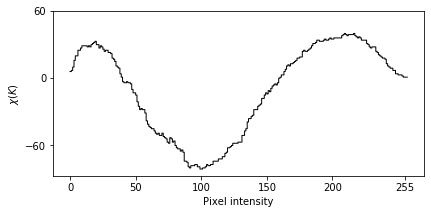

In [8]:
fig, ax = matplotlib_plot(figsize=(6,3))
euler_curve_plot(ax, ecc_naive, xticks=[0, 50, 100, 150, 200, 255], yticks=[-60, 0, 60])

### Big image

In [9]:
np.random.seed(0)
big_image = np.random.randint(0, 256, (512, 512, 512))

In [10]:
big_image.shape

(512, 512, 512)

In [11]:
import time

In [ ]:
st = time.time()
big_naive = c.naive_image_3d(big_image, 256)
print(f"total time: {time.time() - st}") # 1020 secs

In [13]:
st = time.time()
#big_ecc = c.image_3d(big_image, vector_changes, 256)
print(f"total time: {time.time() - st}")  ### 888

total time: 888.5395591259003


In [ ]:
print((np.array(big_naive) == np.array(big_ecc)).all())